<a href="https://colab.research.google.com/github/Luffyapo93/Pool/blob/main/practica_hit_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
import pandas as pd

# Cargar el conjunto de datos en un DataFrame de Pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Archi_CSV/HistoricalPrices.csv")

# Renombrar las columnas para eliminar espacios adicionales si existen
df = df.rename(columns={
    'Fecha': 'Fecha',
    ' Apertura': 'Apertura',
    ' Máximo': 'Máximo',
    ' Mínimo': 'Mínimo',
    ' Cierre': 'Cierre'
})

# Convertir la columna de fecha a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%y')

# Ordenar el conjunto de datos en orden ascendente por fecha
df = df.sort_values(by='Fecha')


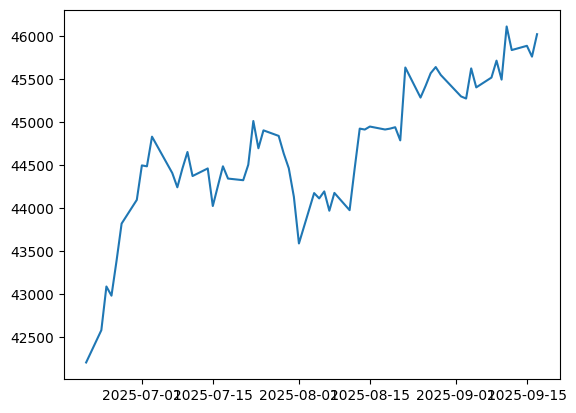

In [20]:
# Extraer las columnas de fecha y precio de cierre
fechas = df['Fecha']
precio_cierre = df['Cierre']

# Crear un gráfico de línea
plt.plot(fechas, precio_cierre)

# Mostrar el gráfico
plt.show()


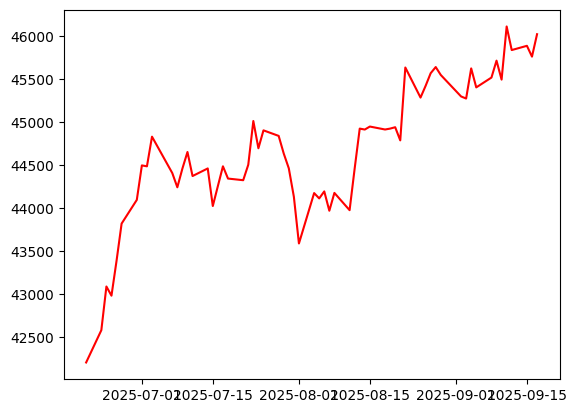

In [21]:
# Graficar en color rojo
plt.plot(fechas, precio_cierre, color='red')

# Mostrar el gráfico
plt.show()


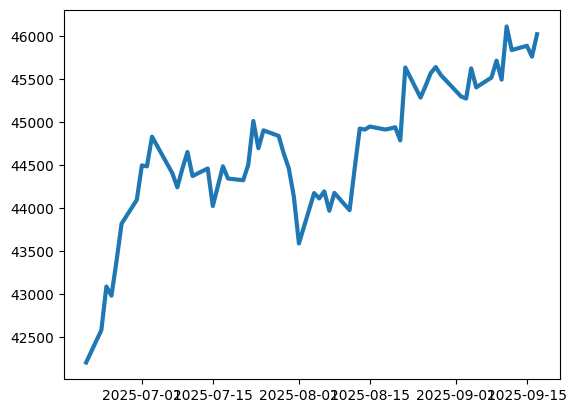

In [22]:
# Aumentar el grosor de la línea
plt.plot(fechas, precio_cierre, linewidth=3)

# Mostrar el gráfico
plt.show()


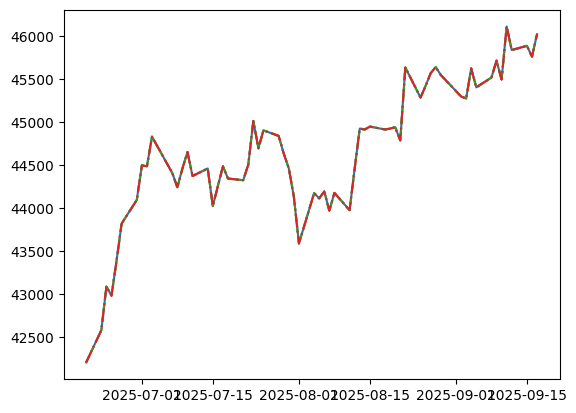

In [23]:
# Graficar líneas individualmente con estilos: sólida, punteada, rayada y raya-punto

plt.plot(fechas, precio_cierre, linestyle='solid')   # Estilo de línea sólido (por defecto)
plt.plot(fechas, precio_cierre, linestyle='dotted')  # Estilo de línea punteada
plt.plot(fechas, precio_cierre, linestyle='dashed')  # Estilo de línea rayada
plt.plot(fechas, precio_cierre, linestyle='dashdot') # Estilo de línea raya-punto

# Mostrar el gráfico
plt.show()


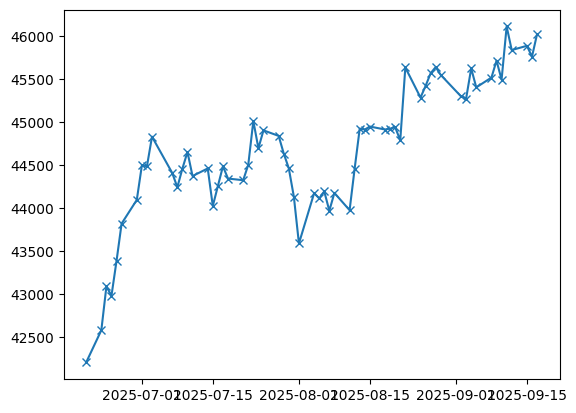

In [24]:
# Agregar un marcador de cruz para cada punto
plt.plot(df['Fecha'], df['Cierre'], marker='x')

# Mostrar el gráfico
plt.show()


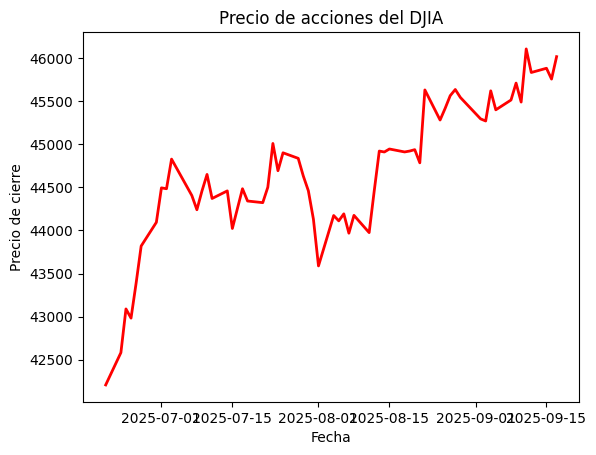

In [25]:
plt.plot(fechas, precio_cierre, color='red', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Precio de acciones del DJIA')

# Mostrar el gráfico
plt.show()


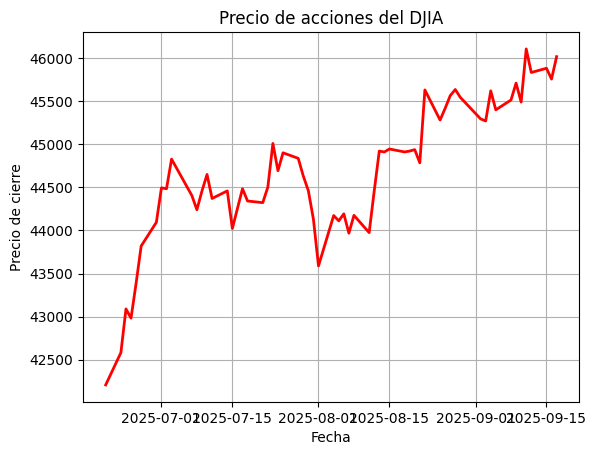

In [26]:
plt.plot(fechas, precio_cierre, color='red', linewidth=2)
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.title('Precio de acciones del DJIA')

# Añadir la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


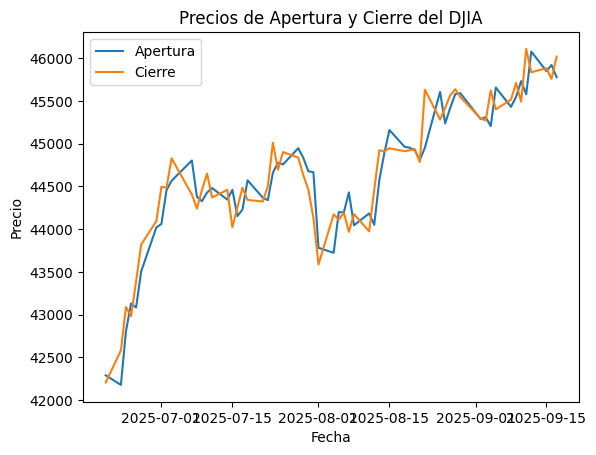

In [27]:
# Gráfico de líneas de los precios de Apertura y Cierre

plt.plot(df['Fecha'], df['Apertura'], label='Apertura')
plt.plot(df['Fecha'], df['Cierre'], label='Cierre')
plt.title('Precios de Apertura y Cierre del DJIA')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()  # Mostrar leyenda para diferenciar las líneas

plt.show()

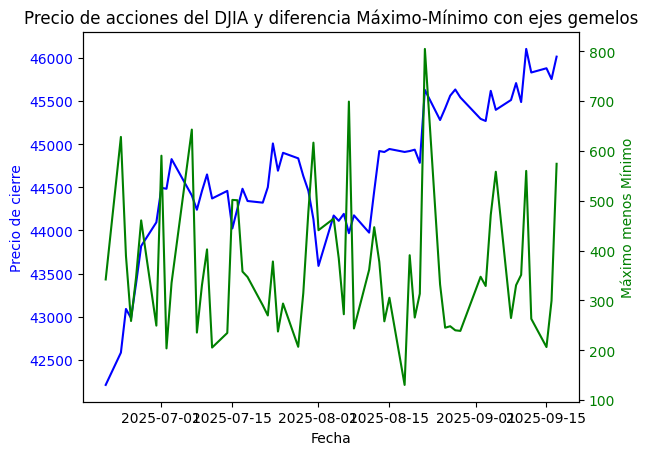

In [28]:
# Crear una nueva variable para demostración
df['Máximo_menos_Mínimo'] = df['Máximo'] - df['Mínimo']

# Crear un gráfico de líneas básico para los precios de cierre
fig, ax1 = plt.subplots()
ax1.plot(df['Fecha'], df['Cierre'], color='blue', label='Precio de cierre')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de cierre', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un eje secundario para la variable Máximo_menos_Mínimo
ax2 = ax1.twinx()
ax2.plot(df['Fecha'], df['Máximo_menos_Mínimo'], color='green', label='Máximo - Mínimo')
ax2.set_ylabel('Máximo menos Mínimo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Añadir título y mostrar el gráfico
plt.title('Precio de acciones del DJIA y diferencia Máximo-Mínimo con ejes gemelos')
plt.show()

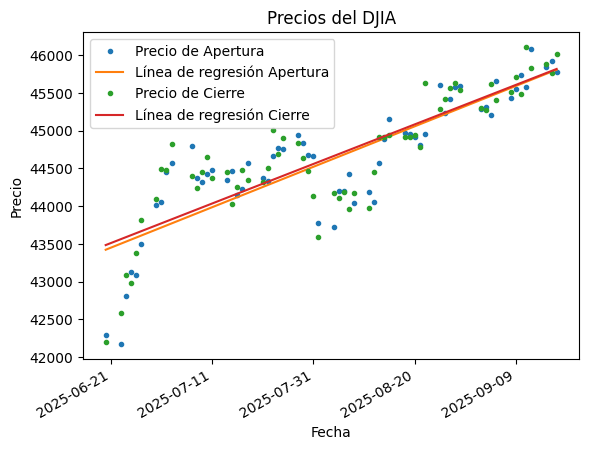

In [29]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

# Convertir la columna Fecha a valores numéricos para el ajuste de regresión
df['Fecha'] = mdates.date2num(df['Fecha'])

# Calcular la línea de regresión para Apertura
coef_apertura = np.polyfit(df['Fecha'], df['Apertura'], 1)
p_apertura = np.poly1d(coef_apertura)

# Calcular la línea de regresión para Cierre
coef_cierre = np.polyfit(df['Fecha'], df['Cierre'], 1)
p_cierre = np.poly1d(coef_cierre)

fig, ax = plt.subplots()
ax.plot(df['Fecha'], df['Apertura'], '.', label='Precio de Apertura')
ax.plot(df['Fecha'], p_apertura(df['Fecha']), '-', label='Línea de regresión Apertura')
ax.plot(df['Fecha'], df['Cierre'], '.', label='Precio de Cierre')
ax.plot(df['Fecha'], p_cierre(df['Fecha']), '-', label='Línea de regresión Cierre')

ax.set_title('Precios del DJIA')
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio')
ax.legend()

# Formatear las etiquetas del eje X como fechas
formato_fecha = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formato_fecha)
plt.gcf().autofmt_xdate()

plt.show()

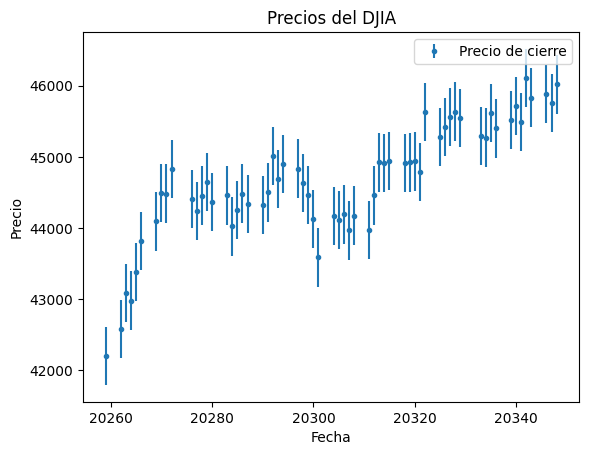

In [30]:
# Calcular la desviación estándar de los datos
desviacion_estandar = df['Cierre'].std()

# Añadir barras de error al gráfico
plt.errorbar(df['Fecha'], df['Cierre'], yerr=desviacion_estandar/2, fmt='.', label='Precio de cierre')
plt.title('Precios del DJIA')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()
